### Otros
### IPN- CIC
### Alumno: Jorge Diego García Torres
#### Titulo : Clasificación de los grados de retinopatía diabética en imágenes del fondo del ojo mediante algoritmos de aprendizaje profundo.

In [3]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

import os
import sys
import cv2
import shutil
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing as mp
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Input


def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)

#%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/test.csv')
print('Number of train samples: ', train_df.shape[0])
print('Number of test samples: ', test_df.shape[0])
display(train_df.head())

Number of train samples:  3662
Number of test samples:  1928


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
train, validation = train_test_split(train_df, test_size=0.2, random_state=seed)

In [ ]:
train['set'] = 'train'
validation['set'] = 'validation'
train_complete = train.append(validation)
train_complete.head()
train_complete.to_csv('hold-out.csv', index=False)
train_complete.head()

,id_code,diagnosis,set
1236,55eac26bd383,1,train
962,44e0d56e9d42,2,train
2447,aa4407aab872,0,train
2991,cffc50047828,0,train
2559,b0f0fa677d5f,0,train


In [ ]:
train_complete.to_csv('/content/gdrive/My Drive/tesis2/hold-out.csv')

In [11]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis2/hold-out.csv')

In [12]:
train_df.head(10)

,Unnamed: 0,id_code,diagnosis,set
0,1236,55eac26bd383,1,train
1,962,44e0d56e9d42,2,train
2,2447,aa4407aab872,0,train
3,2991,cffc50047828,0,train
4,2559,b0f0fa677d5f,0,train
5,728,345b1f0abbba,0,train
6,2472,ab7991df166b,0,train
7,2911,ca63fe4f4b52,1,train
8,2572,b200c23b299b,0,train
9,1675,76bc31e0d3be,0,train


In [14]:
x_train = np.load('/content/gdrive/My Drive/tesis/aptos/train224.npy')

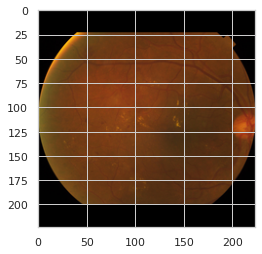

In [13]:
plt.imshow(x_train[0])

In [15]:
X_train = train_df[train_df['set'] == 'train']
X_val = train_df[train_df['set'] == 'validation']

In [22]:
x_train_index =np.array(X_train['Unnamed: 0'])
x_val_index = np.array(X_val['Unnamed: 0'])

In [23]:
y_train = pd.get_dummies(train_df['diagnosis']).values

In [25]:
print(len(X_train))
print(len(X_val))

2929
733


In [27]:
x_train1 = np.empty((2929,224,224,3),dtype='uint8')
x_val1 = np.empty((733,224,224,3),dtype='uint8')

y_train1 =  np.empty((2929,5),dtype='uint8')
y_val1 = np.empty((733,5),dtype='uint8')

for i in range(len(x_train_index)):
  x_train1[i] = x_train[x_train_index[i]]
  y_train1[i] = y_train[x_train_index[i]]

for j in range(len(x_val_index)):
  x_val1[j] = x_train[x_val_index[j]]
  y_val1[j] = y_train[x_val_index[j]]

In [34]:
y_train1 = pd.get_dummies(X_train['diagnosis']).values
y_val1 = pd.get_dummies(X_val['diagnosis']).values

In [ ]:
x_train1.

In [40]:
X_train[:30]

,Unnamed: 0,id_code,diagnosis,set
0,1236,55eac26bd383,1,train
1,962,44e0d56e9d42,2,train
2,2447,aa4407aab872,0,train
3,2991,cffc50047828,0,train
4,2559,b0f0fa677d5f,0,train
5,728,345b1f0abbba,0,train
6,2472,ab7991df166b,0,train
7,2911,ca63fe4f4b52,1,train
8,2572,b200c23b299b,0,train
9,1675,76bc31e0d3be,0,train


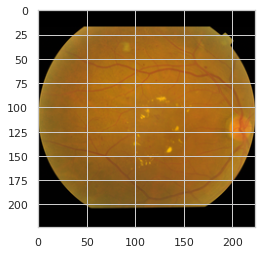

In [46]:
plt.imshow(x_train1[21])

In [35]:
y_train1[:2]

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [47]:
X_val[:30]

,Unnamed: 0,id_code,diagnosis,set
2929,2596,b460ca9fa26f,0,validation
2930,1548,6cee2e148520,0,validation
2931,2912,ca6842bfcbc9,1,validation
2932,1544,6cbc3dad809c,2,validation
2933,2438,a9bc2f892cb3,0,validation
2934,898,40e9b5630438,1,validation
2935,3297,e4e343eaae2a,2,validation
2936,3513,f4d3777f2710,2,validation
2937,224,10a5026eb8e6,0,validation
2938,3121,d8da9de62743,0,validation


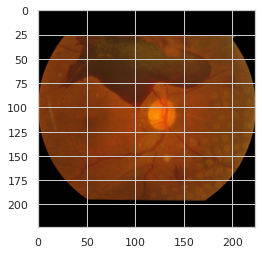

In [53]:
plt.imshow(x_val1[28])

In [38]:
y_val1[:10]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [54]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(2929, 224, 224, 3)
(733, 224, 224, 3)
(2929, 5)
(733, 5)


In [55]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tqdm import tqdm

In [56]:
weights_path_list = ['/content/gdrive/My Drive/tesis2/effNetB5_fold0.h5', '/content/gdrive/My Drive/tesis2/effNetB5_fold1.h5',
                     '/content/gdrive/My Drive/tesis2/effNetB5_fold2.h5', '/content/gdrive/My Drive/tesis2/effNetB5_fold3.h5',
                     '/content/gdrive/My Drive/tesis2/effNetB5_fold4.h5']

In [186]:
def ensemble_preds(model_list, generator):
    preds_ensemble = []
    for model in model_list:
        generator.reset()
        preds = model.predict(generator, verbose = 1)
        preds_ensemble.append(preds)
        generator.reset()

    return np.mean(preds_ensemble, axis=0)


def apply_tta(model, generator, steps=5):
    step_size = generator.n//generator.batch_size
    preds_tta = []
    for i in range(steps):
        generator.reset()
        preds = model.predict_generator(generator, steps=step_size)
        preds_tta.append(preds)

    return np.mean(preds_tta, axis=0)

def test_ensemble_preds(model_list, generator, steps=5):
    preds_ensemble = []
    for model in model_list:
        preds = apply_tta(model, generator, steps)
        preds_ensemble.append(preds)

    return np.mean(preds_ensemble, axis=0)


In [58]:
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)


In [122]:
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=1, seed=2020)
vdata_gen =  test_datagen.flow(x_val1, y_val1, batch_size=1, seed=2020)

In [60]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras import applications
from keras import optimizers,Model,Sequential

In [61]:
pip install -U efficientnet

     |████████████████████████████████| 51kB 2.4MB/s 


In [62]:
import efficientnet.keras as efn 

In [71]:
def create_model(input_shape, n_out, weights_path):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights=None,include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)

    model.load_weights(weights_path)
    return model

In [72]:
model_list = []

for weights_path in weights_path_list:
  model_list.append(create_model(input_shape=(224, 224, 3), n_out=5, weights_path= weights_path))

In [232]:
vdata_gen.reset()

x_vdata = np.zeros((733,224, 224, 3))
y_val2 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_val2 =np.append(y_val2, vdata_gen[i][1], axis=0)
  x_vdata[i]= vdata_gen[i][0]

y_val2 = np.delete(y_val2,0, axis=0)

vdata_gen.reset()

In [233]:
val_gen1 = [np.argmax(pred) for pred in y_val2]
val_gen1

[2,
 2,
 1,
 2,
 4,
 2,
 1,
 2,
 1,
 4,
 2,
 3,
 2,
 1,
 2,
 0,
 4,
 4,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 4,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 4,
 4,
 0,
 2,
 0,
 2,
 2,
 3,
 1,
 3,
 1,
 0,
 0,
 2,
 4,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 4,
 2,
 4,
 2,
 0,
 4,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 3,
 0,
 4,
 1,
 2,
 2,
 4,
 0,
 4,
 4,
 0,
 2,
 0,
 2,
 2,
 3,
 1,
 3,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 4,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 4,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 4,
 2,
 0,
 1,
 4,
 1,
 0,
 2,
 1,
 2,
 2,
 0,
 3,
 2,
 0,
 1,
 1,
 4,
 1,
 0,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 4,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 4,
 0,
 1,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 3,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 4,
 1,
 2,
 4,
 2,
 2,
 2,


In [255]:
preds_ensemble = []

In [256]:
val_preds_model1 = model_list[0].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model1)
val_preds_model1 = [np.argmax(pred) for pred in val_preds_model1]


23/23 [==============================] - 3s 117ms/step


In [257]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model1, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.943


In [258]:
val_preds_model2 = model_list[1].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model2)
val_preds_model2 = [np.argmax(pred) for pred in val_preds_model2]

23/23 [==============================] - 3s 117ms/step


In [259]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model2, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.938


In [260]:
val_preds_model3 = model_list[2].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model3)
val_preds_model3 = [np.argmax(pred) for pred in val_preds_model3]

23/23 [==============================] - 3s 116ms/step


In [261]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model3, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.958


In [262]:
val_preds_model4 = model_list[3].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model4)
val_preds_model4 = [np.argmax(pred) for pred in val_preds_model4]

23/23 [==============================] - 3s 116ms/step


In [263]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model4, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.960


In [264]:
val_preds_model5 = model_list[4].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model5)
val_preds_model5 = [np.argmax(pred) for pred in val_preds_model5]

23/23 [==============================] - 3s 116ms/step


In [265]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model5, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.939


In [267]:
preds_ensemble=np.mean(preds_ensemble, axis=0)
preds_ensemble = [np.argmax(pred) for pred in preds_ensemble]

In [268]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(preds_ensemble, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.964
